# Bandas de Bollinger

### Material para consulta - Teoria
 - https://www.suno.com.br/artigos/bandas-de-bollinger/
 - https://www.nelogica.com.br/conhecimento/artigos/indicadores-estudo/bandas-bollinger
 - https://coinext.com.br/blog/bandas-de-bollinger

---

### Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import pandas_datareader
import pandas_datareader.data as web
import datetime

---

In [3]:
bitcoin = web.get_data_yahoo('BTC-USD', 
                          start=datetime.datetime(2021, 10, 1))

In [4]:
bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-01,48436.011719,43320.023438,43816.742188,48116.941406,42850641582,48116.941406
2021-10-02,48282.062500,47465.496094,48137.468750,47711.488281,30614346492,47711.488281
2021-10-03,49130.691406,47157.289062,47680.027344,48199.953125,26638115879,48199.953125
2021-10-04,49456.777344,47045.003906,48208.906250,49112.902344,33383173002,49112.902344
2021-10-05,51839.984375,49072.839844,49174.960938,51514.812500,35873904236,51514.812500
...,...,...,...,...,...,...
2022-04-23,39935.859375,39352.203125,39738.722656,39486.730469,16138021249,39486.730469
2022-04-24,39845.925781,39233.539062,39478.375000,39469.292969,17964398167,39469.292969
2022-04-25,40491.753906,38338.378906,39472.605469,40458.308594,35445730570,40458.308594


<AxesSubplot:xlabel='Date'>

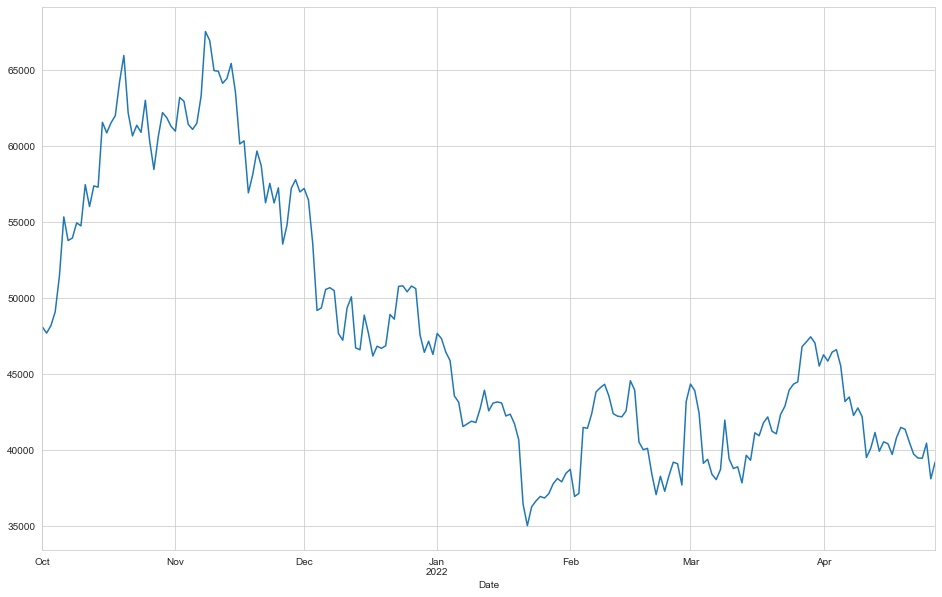

In [5]:
bitcoin['Close'].plot(figsize = (16, 10))

In [6]:
# Calcular Média Móvel Simples
bitcoin['MMS20'] = bitcoin['Close'].rolling(window = 20).mean()

# Calculando o Desvio Padrão (necessário para criar a banda superior e inferior)
bitcoin['Desvio_Padrao'] = bitcoin['Close'].rolling(window = 20).std()

# Calculando a Banda Superior
bitcoin['Banda_Superior'] = bitcoin['MMS20'] + (bitcoin['Desvio_Padrao'] * 2)

# Calculando a Banda Inferior
bitcoin['Banda_Inferior'] = bitcoin['MMS20'] - (bitcoin['Desvio_Padrao'] * 2)

In [7]:
bitcoin

,High,Low,Open,Close,Volume,Adj Close,MMS20,Desvio_Padrao,Banda_Superior,Banda_Inferior
Date,,,,,,,,,,
2021-10-01,48436.011719,43320.023438,43816.742188,48116.941406,42850641582,48116.941406,NaN,NaN,NaN,NaN
2021-10-02,48282.062500,47465.496094,48137.468750,47711.488281,30614346492,47711.488281,NaN,NaN,NaN,NaN
2021-10-03,49130.691406,47157.289062,47680.027344,48199.953125,26638115879,48199.953125,NaN,NaN,NaN,NaN
2021-10-04,49456.777344,47045.003906,48208.906250,49112.902344,33383173002,49112.902344,NaN,NaN,NaN,NaN
2021-10-05,51839.984375,49072.839844,49174.960938,51514.812500,35873904236,51514.812500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-23,39935.859375,39352.203125,39738.722656,39486.730469,16138021249,39486.730469,41553.535937,1979.933880,45513.403697,37593.668178
2022-04-24,39845.925781,39233.539062,39478.375000,39469.292969,17964398167,39469.292969,41195.866797,1631.466420,44458.799637,37932.933957
2022-04-25,40491.753906,38338.378906,39472.605469,40458.308594,35445730570,40458.308594,40940.982617,1273.328640,43487.639898,38394.325337


Text(0.5, 1.0, 'Bandas de Bollinger')

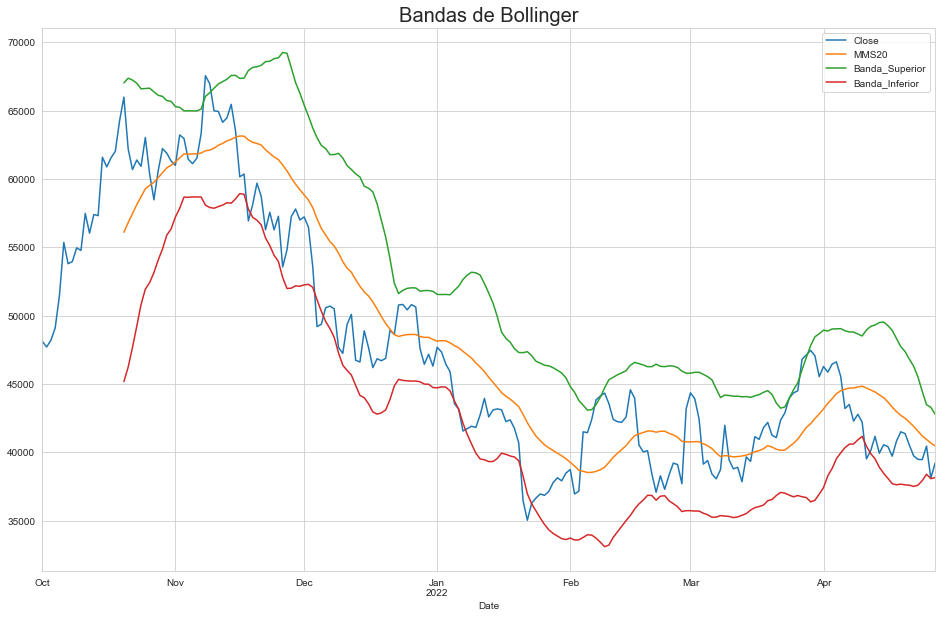

In [8]:
bitcoin[['Close', 'MMS20', 'Banda_Superior', 'Banda_Inferior']].plot(figsize = (16, 10))
plt.title('Bandas de Bollinger', fontsize = 20)

In [9]:
bitcoin = bitcoin[19:].copy()
bitcoin.head()

,High,Low,Open,Close,Volume,Adj Close,MMS20,Desvio_Padrao,Banda_Superior,Banda_Inferior
Date,,,,,,,,,,
2021-10-20,66930.390625,63610.675781,64284.585938,65992.835938,40788955582,65992.835938,56105.015039,5464.483159,67033.981356,45176.048722
2021-10-21,66600.546875,62117.410156,66002.234375,62210.171875,45908121370,62210.171875,56809.676562,5285.947657,67381.571876,46237.781249
2021-10-22,63715.023438,60122.796875,62237.890625,60692.265625,38434082775,60692.265625,57458.715430,4892.292804,67243.301038,47674.129821
2021-10-23,61743.878906,59826.523438,60694.628906,61393.617188,26882546034,61393.617188,58118.398633,4447.419019,67013.236670,49223.560595
2021-10-24,61505.804688,59643.343750,61368.343750,60930.835938,27316183882,60930.835938,58709.295312,3944.608880,66598.513072,50820.077553


In [10]:
# Criando as colunas de Sinal de Compra e Venda
bitcoin['Sinal_de_Compra'] = np.where(bitcoin['Banda_Inferior'] > bitcoin['Close'], bitcoin['Close'], np.nan)
bitcoin['Sinal_de_Venda'] = np.where(bitcoin['Banda_Superior'] < bitcoin['Close'], bitcoin['Close'], np.nan)

In [11]:
bitcoin.head()

,High,Low,Open,Close,Volume,Adj Close,MMS20,Desvio_Padrao,Banda_Superior,Banda_Inferior,Sinal_de_Compra,Sinal_de_Venda
Date,,,,,,,,,,,,
2021-10-20,66930.390625,63610.675781,64284.585938,65992.835938,40788955582,65992.835938,56105.015039,5464.483159,67033.981356,45176.048722,NaN,NaN
2021-10-21,66600.546875,62117.410156,66002.234375,62210.171875,45908121370,62210.171875,56809.676562,5285.947657,67381.571876,46237.781249,NaN,NaN
2021-10-22,63715.023438,60122.796875,62237.890625,60692.265625,38434082775,60692.265625,57458.715430,4892.292804,67243.301038,47674.129821,NaN,NaN
2021-10-23,61743.878906,59826.523438,60694.628906,61393.617188,26882546034,61393.617188,58118.398633,4447.419019,67013.236670,49223.560595,NaN,NaN
2021-10-24,61505.804688,59643.343750,61368.343750,60930.835938,27316183882,60930.835938,58709.295312,3944.608880,66598.513072,50820.077553,NaN,NaN


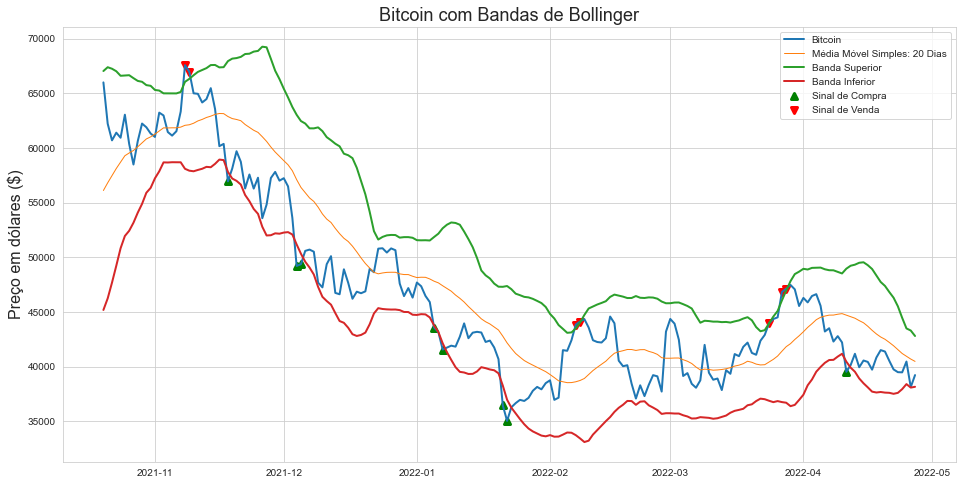

In [12]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(bitcoin.index, bitcoin['Close'], linewidth = 2, label = 'Bitcoin')
ax.plot(bitcoin.index, bitcoin['MMS20'], linewidth = 1, label = 'Média Móvel Simples: 20 Dias')
ax.plot(bitcoin.index, bitcoin['Banda_Superior'], linewidth = 2, label = 'Banda Superior')
ax.plot(bitcoin.index, bitcoin['Banda_Inferior'], linewidth = 2, label = 'Banda Inferior')

ax.scatter(bitcoin.index, bitcoin['Sinal_de_Compra'], color = 'green', marker = '^', linewidth = 3, label = 'Sinal de Compra')
ax.scatter(bitcoin.index, bitcoin['Sinal_de_Venda'], color = 'red', marker = 'v', linewidth = 3, label = 'Sinal de Venda')

ax.set_title("Bitcoin com Bandas de Bollinger", fontsize = 18)
ax.set_ylabel("Preço em dólares ($)", fontsize = 16)

plt.legend()
plt.show()

___